# **DAT565E-Deep Learning for Prediction of Business Outcomes**

<div class="LI-profile-badge"  data-version="v1" data-size="large" data-locale="en_US" data-type="horizontal" data-theme="light" data-vanity="drsalihtutun"><a class="LI-simple-link" href='https://www.linkedin.com/in/drsalihtutun/en-us?trk=profile-badge'>Salih Tutun, PhD</a></div>

![Imgur](https://i.imgur.com/4HJknC2.png)

# Lab-based Group Assignment 2:
## Customer Churning Prediction in the Telecommunications Sector

Tele-communication business suffers from customer churning. Those companies are especially interested in a customer churn early warning system. One of the most important components in such a system, is to predict whether a customer will churn with existing information. Companies are working hard to survive in this competitive market by using three main strategies:(1) acquire new customers, (2) upsell the existing customers, and (3) increase the retention period of customers.

**Credit:** Ahmad, Abdelrahim Kasem, Assef Jafar, and Kadan Aljoumaa. "Customer churn prediction in telecom using machine learning in big data platform." Journal of Big Data 6, no. 1 (2019): 28.

<img src="https://miro.medium.com/max/1400/1*Xap6OxaZvD7C7eMQKkaHYQ.jpeg">

### Business Problem

The problem is to detect the potential of customer’s churn for decreasing the potential of customer’s churn, known as “the customer movement from one provider to another”. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn.

## *Please fill the below codes and find the best accuracy for training dataset and validation dataset based on the below questions. At the end, please explain how to improve the results!*

Note: Both accuracies are supposed to close to 0.9 or greater than this value. We will grade the assignment based on how your results close. For example, if your result is training = 0.89 and validation = 0.89, you will lose 2 points of the total grades.

- You can use L2 and dropout
- You can change the architecture (number of hidden layers or neurons)
- You can use early stoping
- You can change the batch size or epochs

Let's start to design our model!

## Q1: Please read and load the dataset?

In [1]:
# Mount with Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data

In [17]:
import pandas as pd

# read csv
df = pd.read_csv("/content/drive/MyDrive/[2024FL] Deep Learning/Week 2/churn-dataset.csv")

In [18]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


## Q2: Please preprocess the dataset for the analysis?

Preprocessing

In [19]:
# Categorical -> dummy variables
df=pd.concat([df,pd.get_dummies(df.State)],axis=1)

# Categorical -> 0,1
df.applymap(lambda x: 0 if x=="No" else (1 if x=="Yes" else x))

# Drop the columns
df.drop(["State","International plan","Voice mail plan"],axis=1,inplace=True)

# Min-max scaling
for col in df.columns[:16]:
    df.loc[:,col]=(df.loc[:,col]-df.loc[:,col].min())/(df.loc[:,col].max()-df.loc[:,col].min())

<ipython-input-19-ab3b94314832>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: 0 if x=="No" else (1 if x=="Yes" else x))


In [20]:
df


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.524793,0.068627,0.50,0.755701,0.68750,0.755701,0.542755,0.582353,0.542866,0.572161,...,False,False,False,False,False,False,False,False,False,False
1,0.438017,0.068627,0.52,0.460661,0.76875,0.460597,0.537531,0.605882,0.537690,0.599772,...,False,False,False,False,False,False,False,False,False,False
2,0.561983,0.068627,0.00,0.693843,0.71250,0.693830,0.333242,0.647059,0.333225,0.338457,...,False,False,False,False,False,False,False,False,False,False
3,0.342975,0.000000,0.00,0.853478,0.44375,0.853454,0.170195,0.517647,0.170171,0.436095,...,False,False,False,False,False,False,False,False,False,False
4,0.305785,0.068627,0.00,0.475200,0.70625,0.475184,0.407754,0.717647,0.407959,0.407629,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0.322314,0.068627,0.00,0.383979,0.61250,0.383970,0.521584,0.400000,0.521514,0.505835,...,False,False,False,False,False,False,False,False,False,False
2662,0.789256,0.068627,0.72,0.445268,0.48125,0.445171,0.592521,0.741176,0.592688,0.670083,...,False,False,False,False,False,False,False,False,False,False
2663,0.276860,0.068627,0.00,0.658780,0.35625,0.658786,0.421776,0.323529,0.421870,0.420154,...,False,False,False,False,False,False,False,False,True,False
2664,0.111570,1.000000,0.00,0.515393,0.68125,0.515426,0.794061,0.341176,0.794241,0.421862,...,False,False,False,False,False,False,False,False,False,False


**Think about it: Why this step is necessary?** \\

The procedure can help prepare the dataset for machine learning models.

1) dummy variables: Machine learing models can only process numerical input, not categorical data. get_dummies method can convert a categorical column into numerous binary columns.

2) Binary numerical: Binary categorical variables should be converted as numerical ones for machine learning models.

3) droping unnecessary columns: The "State", "International plan", "Voice mail plan" columns are unnecessary, so we remove them.

4) Min-Max scaling: it can make sure that features are on a standardized scale, which improves model performance.

Train-Validation-Test-Split

In [21]:
from sklearn.model_selection import train_test_split

# Train-test-validation split
train,_=train_test_split(df,test_size=0.1,stratify=df["Churn"])
validation,test=train_test_split(_,test_size=0.5)
print(train.shape,validation.shape,test.shape)

(2399, 68) (133, 68) (134, 68)


**Think about it**: \\
Why should we split the data set to 3 subsets (train, validation, and test)?
If we want to split the data set to train: validation : test = 7:2:1, how will we adjust parameters in train_test_split()?

Splitting the dataset into three subsets can ensure the better-trained model. In the training set, the model fits itself to the training data by adjusting its parameters. In the validation set, we can reduce overfitting by evaluating how well the model perform in the unseen data. In this phase, tuning hyperparameters are executed including learning rate, regularization, and number of layers. Lastly, in the test set, we can evaluate its performance on another unseen data.

In order to split the dataset into train:validation:data = 7:2:1, we can put 0.3 and 0.3333 in the first split and the second split respectively.

## Q3: Please design your model with out using regularization and explain why the results like this?

### Please design your model without regularization.

In [22]:
!pip install keras_visualizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from keras_visualizer import visualizer

model=Sequential()
model.add(Dense(64,input_shape=(df.shape[1]-1,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))


# Used rmsprop optimizer, binary_crossentropy loss
# you can use adam and SGD instead of rmsprop as well
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=32, epochs=100)
#The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. The network will update once a batch is finished.
#The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8559 - loss: 0.4509 - val_accuracy: 0.8872 - val_loss: 0.3714
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8564 - loss: 0.4099 - val_accuracy: 0.8872 - val_loss: 0.3444
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.3908 - val_accuracy: 0.8872 - val_loss: 0.3356
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.3921 - val_accuracy: 0.8872 - val_loss: 0.3119
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.3595 - val_accuracy: 0.8872 - val_loss: 0.3038
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.3561 - val_accuracy: 0.8872 - val_loss: 0.2904
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8601 - loss: 0.3494 - val_accuracy: 0.8872 - val_loss: 0.2984
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.3468 - val_accuracy: 0.8872 - val_loss: 0.2

**Think about it**: What is an activation function and what does it do in a network? \\

An activation function is applied to the output of a neuron in a neural network to introduce non-linearity. by using this, the network can learn complex patterns by modeling non-linear relationships between inputs and outputs. The neural network model with an activation function can solve more complex problems compared to a plain linear model.


Pay attention to various non-linear activations in use. \\
*   How to define them?
*   How to choose those activation function in practical problems?

There are several non-linear activations such as Sigmoid, ReLU, Leaky ReLU,Tanh, and softmax. For binary classification like this problem, we can use ReLU in hidden layers, and Sigmoid in an output layer. If we have to solve multi-class classification problem, we can use softmax in an output layer instead of sigmoid. The softmax function can convert the outputs into probabilities that sum to 1.




<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

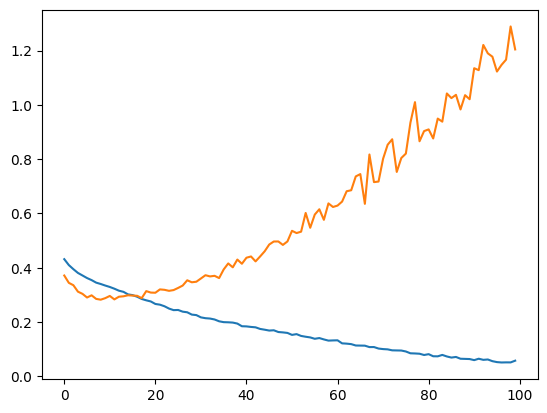

In [23]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

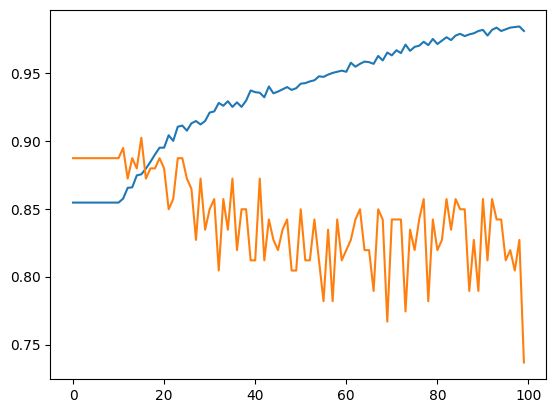

In [24]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [25]:
from keras.losses import binary_crossentropy

# real y
real = test.Churn.astype("int").values
# predicted y
pred = model.predict(test.drop("Churn",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1.2351759672164917


In [26]:
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.7611940298507462


Comment: Please explain your model and why the results like this.

**Think about it**: Is it underfitting or Overfitting? What are methods to improve results?

It is overfitting. We can implement early stopping, regularization, data augmentation or increase of training data. Additionally, we can decrease the number of neurons in each layer.

### Please use Early Stopping and show how to improve the results.

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

model=Sequential()
model.add(Dense(64,input_shape=(df.shape[1]-1,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))

# Used rmsprop optimizer, binary_crossentropy loss
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=32, epochs=50) #We can realize "early stop" by reducing the parameter "epoch". The training will stop after finishing the number of epoch you set.

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8308 - loss: 0.5166 - val_accuracy: 0.8872 - val_loss: 0.3599
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.4035 - val_accuracy: 0.8872 - val_loss: 0.3517
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8697 - loss: 0.3704 - val_accuracy: 0.8872 - val_loss: 0.3399
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8601 - loss: 0.3791 - val_accuracy: 0.8872 - val_loss: 0.3252
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8525 - loss: 0.3755 - val_accuracy: 0.8947 - val_loss: 0.3108
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8445 - loss: 0.3862 - val_accuracy: 0.8947 - val_loss: 0.3043
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8714 - loss: 0.3337 - val_accuracy: 0.9023 - val_loss: 0.3099
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3538 - val_accuracy: 0.9098 - val_loss: 0.3050
Epo

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

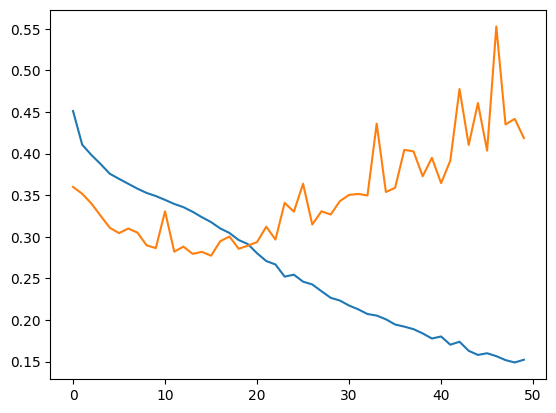

In [28]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

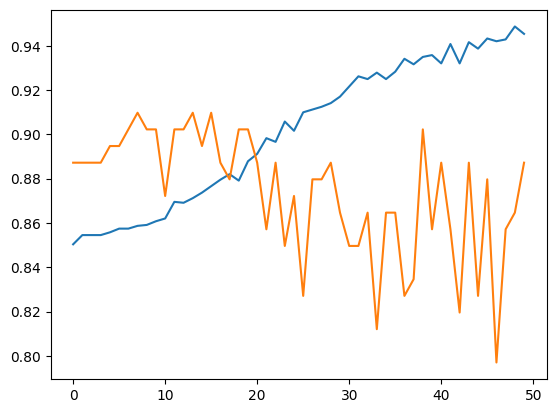

In [29]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [30]:
from keras.losses import binary_crossentropy

# real y
real = test.Churn.astype("int").values
# predicted y
pred = model.predict(test.drop("Churn",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0.44530460238456726


In [31]:
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.8731343283582089


Comment: Please explain your model and why the results like this.

The training loss is steadily decreasing, which means the model is learning the pattern. Whereas, the validation loss initally decreases but suddenly starts increasing after around 20 epochs.

In thte accuracy graph, we can notice that the model is getting better at prediting the training data compared to the validation data in overall.

Finally, the test accuracy is 87.3% and we are quite satisfiable.

## Q4: How you can solve the problem and improve your model?

### Please add the Dropout on your model.

In [32]:
# Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

# Drop out used at the first two layers
model=Sequential()
model.add(Dense(64,input_shape=(df.shape[1]-1,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=32, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8562 - loss: 0.4832 - val_accuracy: 0.8872 - val_loss: 0.3576
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8540 - loss: 0.4247 - val_accuracy: 0.8872 - val_loss: 0.3400
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.4165 - val_accuracy: 0.8872 - val_loss: 0.3311
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8665 - loss: 0.3749 - val_accuracy: 0.8872 - val_loss: 0.3226
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8565 - loss: 0.3814 - val_accuracy: 0.8872 - val_loss: 0.3248
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8423 - loss: 0.3953 - val_accuracy: 0.8872 - val_loss: 0.3293
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3645 - val_accuracy: 0.8872 - val_loss: 0.3100
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8540 - loss: 0.3758 - val_accuracy: 0.8872 - val_loss: 0.2960
Epo

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

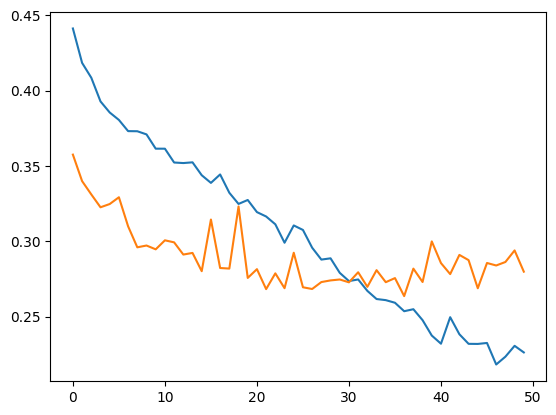

In [33]:
# same as above, plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

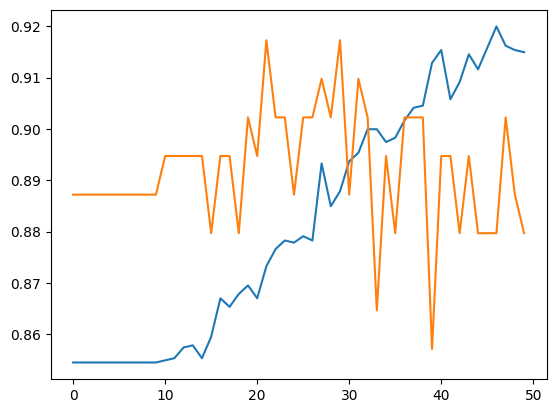

In [34]:
# same as above, plot accuracy, val_accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [35]:
# same as above, calculate  binary_crossentropy
from keras.losses import binary_crossentropy
real = test.Churn.astype("int").values
pred = model.predict(test.drop("Churn",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0.40519893169403076


In [36]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.8805970149253731


**Comment**: Please explain your model and why the results like this.

Compared to the previous scores, we can get more improved binary_crossentropy and accuracy. The model has improved.

### Please add L2 Weight Regularization

- Softmax, LR decay, optimizers, units, and layers

In [37]:
# L2

model=Sequential()
# L2 regularization applied at the first hidden layer
model.add(Dense(64,input_shape=(df.shape[1]-1,), activation='relu', kernel_regularizer="l2"))
model.add(Dense(32, activation='relu', kernel_regularizer="l2"))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="relu"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=32, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8540 - loss: 1.6505 - val_accuracy: 0.8872 - val_loss: 0.8878
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.8685 - val_accuracy: 0.8872 - val_loss: 0.6038
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.6277 - val_accuracy: 0.8872 - val_loss: 0.4921
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.5530 - val_accuracy: 0.8872 - val_loss: 0.4740
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8533 - loss: 0.5091 - val_accuracy: 0.8872 - val_loss: 0.4325
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.4892 - val_accuracy: 0.8872 - val_loss: 0.4239
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.4588 - val_accuracy: 0.8872 - val_loss: 0.4059
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8597 - loss: 0.4795 - val_accuracy: 0.8872 - val_loss: 0.4273
Epo

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

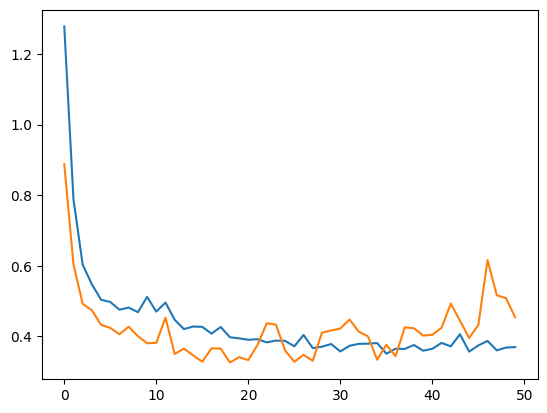

In [38]:
# same as above, plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

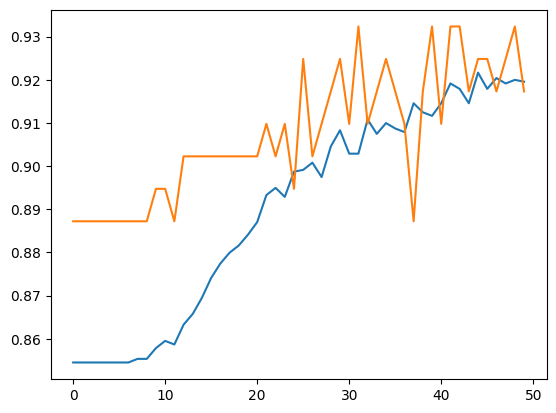

In [39]:
# same as above, plot accuracy, val_accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [40]:
# same as above, calculate  binary_crossentropy
from keras.losses import binary_crossentropy
real = test.Churn.astype("int").values
pred = model.predict(test.drop("Churn",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0.5424289703369141


In [41]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.8507462686567164


### Please use L2 + Dropout together

In [43]:
# Dropout + L2

model=Sequential()
model.add(Dense(64,input_shape=(df.shape[1]-1,), activation='relu', kernel_regularizer="l2"))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=32, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8050 - loss: 1.0147 - val_accuracy: 0.8872 - val_loss: 0.5961
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8583 - loss: 0.5993 - val_accuracy: 0.8872 - val_loss: 0.4317
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8446 - loss: 0.4968 - val_accuracy: 0.8872 - val_loss: 0.3758
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.4528 - val_accuracy: 0.8872 - val_loss: 0.3558
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8477 - loss: 0.4285 - val_accuracy: 0.8872 - val_loss: 0.3395
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8544 - loss: 0.4148 - val_accuracy: 0.8872 - val_loss: 0.3432
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.4058 - val_accuracy: 0.8872 - val_loss: 0.3404
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.4044 - val_accuracy: 0.8872 - val_loss: 0.3234
Epo

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

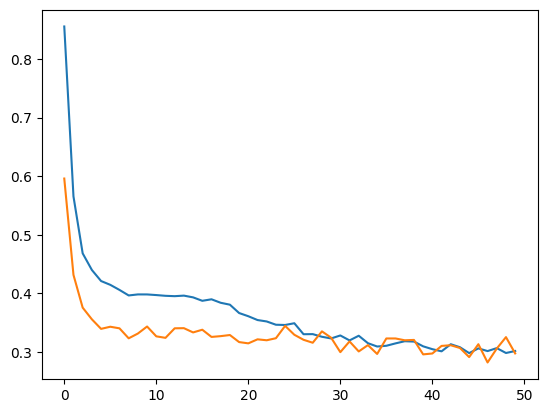

In [44]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

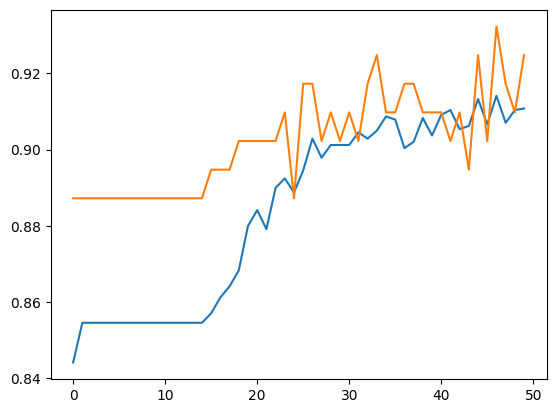

In [45]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [46]:
from keras.losses import binary_crossentropy
real = test.Churn.astype("int").values
pred = model.predict(test.drop("Churn",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0.36974114179611206


In [47]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.8656716417910447


Comment: Please explain your model and why the results like this.

Dropout can help us reduce overfitting problem by randomly remove neurons in each epoch during the training process. Thus, the validation MSE and the test MSE increase.
Also, L2 can help us decrease overfitting problem as well. It adds a penalty, which is proportional to the sum of the squared values of the weight, to the loss function in each training. This forces the model not only to minimize the original loss but also the size of the weights, prevents the model from having significant weight.

## Q5: Please interpret all results here!

Note: Please explain what did you see and how to improve the model. You can compare all models and show what we need to do if we have overfitting and underfitting in the model. \\

Hint:
1.   overfitting or underfitting problem
2.   steps to imporve the results
3.   results

Comment:

Our model size is fixed: 67 neuron s in the input layer, 64 in the first hidden layer, 32 in the second layer, 16 in the third hidden layer, 8 in the fourth hidden layer, and 1 in the output layer. Also, our batch size is a consistent 32.

Our first model has 100 epochs, and the result is: Training Accuracy = 98.2%, Validation Accuracy = 73.68%, and Test Accuracy = 76.11%. There is a significant overfitting in our first model.

To reduce the overfitting problem, we decreased the epochs size from 100 to 50. And the result is: Training Accuracy = 95.11%, Validation Accuracy = 88.72%, and Test Accuracy = 87.31%. The model has a better performance, but is still overfitting.

Our third model is adding dropouts on the second model. And the result is: Training Accuracy = 90.96%, Validation Accuracy = 87.97%, and Test Accuracy = 88.06%. The model has a better performance than the second model, but is still overfitting.

Our fourth model is adding L2 regularization on the second model. And the result is: Training Accuracy = 91.78%, Validation Accuracy = 91.73%, and Test Accuracy = 85.07. The model has a better performance than the second model.

Our fifth model is adding both dropouts and L2 regularization on the second model. And the result is: Training Accuracy = 92.01%, Validation Accuracy = 92.48%, and Test Accuracy = 85.57%. The model has the best performance of all, and does not have significant overfitting problem.

If you have questions, please contact with me.

Salih Tutun, PhD

salihtutun@wustl.edu